#### Importing Libraries for the project

In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
import pydotplus
import graphviz 
import statsmodels.api as sn
from IPython.display import Image
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

#### Loading csv file for the project

In [126]:
df = pd.read_excel("sydney_rain prediction.xlsx",header=0)
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

## Data Pre-processing

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [128]:
print(df.isnull().sum())

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64


#### Filling NA values with Mean & Mode

In [129]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

In [130]:
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

In [131]:
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())

In [132]:
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

In [133]:
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

In [134]:
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

In [135]:
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

In [136]:
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

In [137]:
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

In [138]:
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())

In [139]:
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

In [140]:
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

In [141]:
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [142]:
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3337 non-null   object  

In [144]:
df.describe()

Date      MinTemp      MaxTemp     Rainfall  \
count                           3337  3337.000000  3337.000000  3337.000000   
mean   2012-10-16 01:24:34.737788672    14.865057    23.002339     3.330231   
min              2008-02-01 00:00:00     4.300000    11.700000     0.000000   
25%              2010-05-15 00:00:00    11.000000    19.600000     0.000000   
50%              2012-09-28 00:00:00    14.900000    22.800000     0.000000   
75%              2015-03-14 00:00:00    18.700000    26.000000     1.400000   
max              2017-06-25 00:00:00    27.600000    45.800000   119.400000   
std                              NaN     4.551593     4.493290     9.886270   

       Evaporation     Sunshine  Humidity9am  Humidity3pm  Pressure9am  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean      5.187432     7.179374    68.229010    54.699158  1018.346156   
min       0.000000     0.000000    19.000000    10.000000   986.700000   
25%       3.200000     4.300000    58.000000    44.000000  1013.800000   
50%       4.800000     8.200000    69.000000    56.000000  1018.500000   
75%       7.000000    10.200000    80.000000    64.000000  1023.100000   
max      18.400000    13.600000   100.000000    99.000000  1039.000000   
std       2.756095     3.801737    15.053668    16.261752     7.000492   

       Pressure3pm     Cloud9am     Cloud3pm      Temp9am      Temp3pm  
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000  
mean   1016.018774     4.181523     4.218660    17.819742    21.533333  
min     989.800000     0.000000     0.000000     6.400000    10.200000  
25%    1011.300000     2.000000     2.000000    13.800000    18.400000  
50%    1016.300000     4.181523     4.218660    18.200000    21.300000  
75%    1020.800000     7.000000     7.000000    21.700000    24.500000  
max    1036.700000     9.000000     8.000000    36.500000    44.700000  
std       7.012157     2.505491     2.409531     4.894240     4.301156

#### Dropping Date and Location Columns

In [145]:
df = df.drop(columns=['Location'])
df = df.drop(columns=['Date'])

#### Outlier Detection

<Axes: xlabel='RainTomorrow', ylabel='count'>

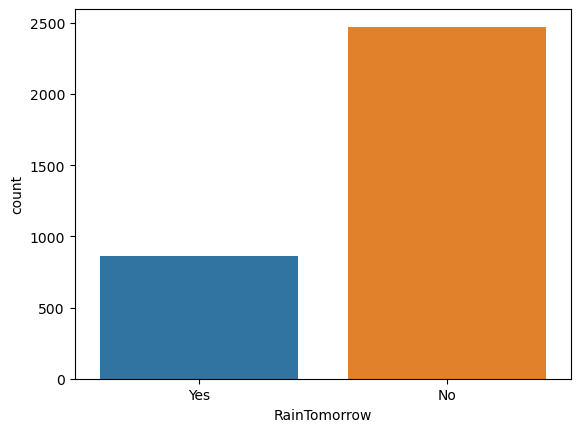

In [146]:
sns.countplot(x='RainTomorrow',data=df)

<Axes: xlabel='RainToday', ylabel='count'>

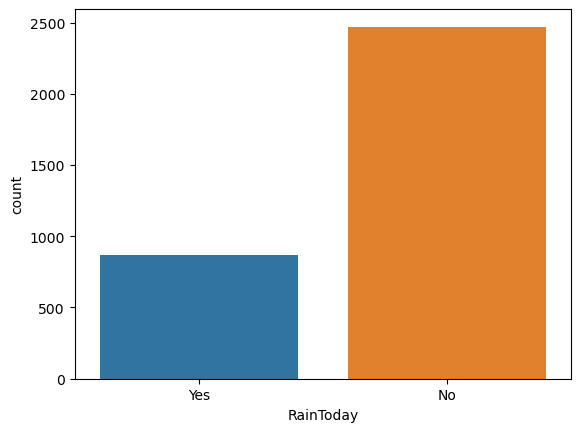

In [147]:
sns.countplot(x='RainToday',data=df)

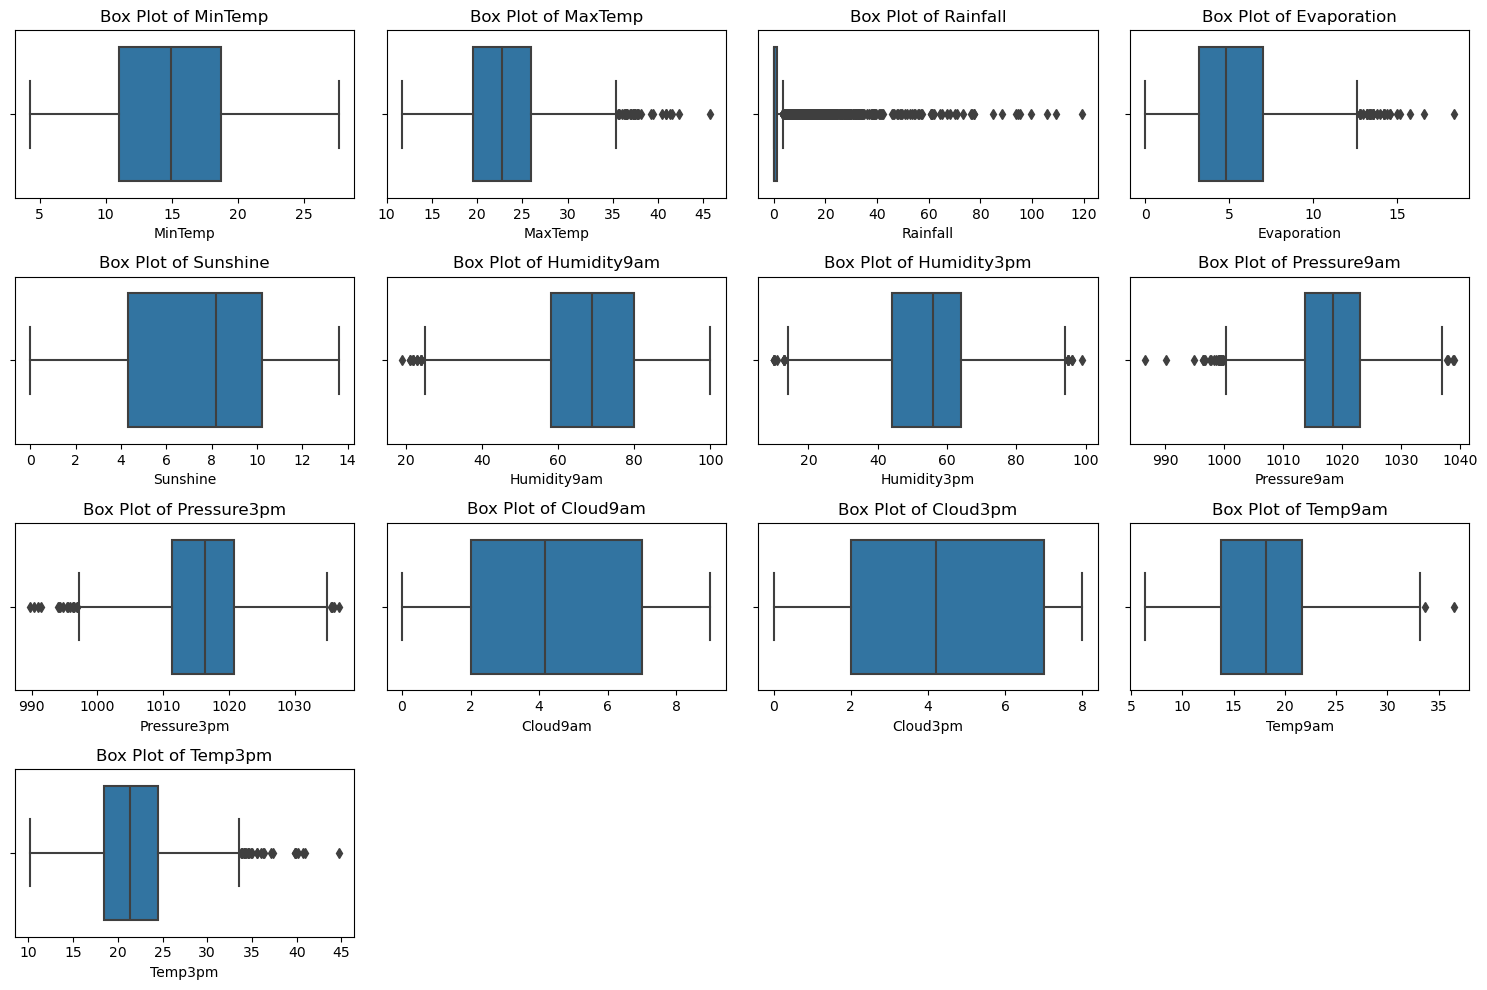

In [148]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_df.columns, 1) :
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    
plt.tight_layout()
plt.show()

#### Creating Dummy Variables

In [149]:
df = pd.get_dummies(df,columns = ["RainToday","RainTomorrow"],drop_first = True) 
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0     19.5     22.4      15.6     6.200000       0.0         92.0   
1     19.5     25.6       6.0     3.400000       2.7         83.0   
2     21.6     24.5       6.6     2.400000       0.1         88.0   
3     20.2     22.8      18.8     2.200000       0.0         83.0   
4     19.7     25.7      77.4     5.187432       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         84.0       1017.6       1017.4       8.0       8.0     20.7   
1         73.0       1017.9       1016.4       7.0       7.0     22.4   
2         86.0       1016.7       1015.6       7.0       8.0     23.5   
3         90.0       1014.2       1011.8       8.0       8.0     21.4   
4         74.0       1008.3       1004.8       8.0       8.0     22.5   

   Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.9           True              True  
1     24.8           True              True  
2     23.0           True              True  
3     20.9           True              True  
4     25.5           True              True

In [150]:
print(df.dtypes)

MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RainToday_Yes          bool
RainTomorrow_Yes       bool
dtype: object


In [151]:
df['RainToday_Yes'] = df['RainToday_Yes'].astype(int)
df['RainTomorrow_Yes'] = df['RainTomorrow_Yes'].astype(int)
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0     19.5     22.4      15.6     6.200000       0.0         92.0   
1     19.5     25.6       6.0     3.400000       2.7         83.0   
2     21.6     24.5       6.6     2.400000       0.1         88.0   
3     20.2     22.8      18.8     2.200000       0.0         83.0   
4     19.7     25.7      77.4     5.187432       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         84.0       1017.6       1017.4       8.0       8.0     20.7   
1         73.0       1017.9       1016.4       7.0       7.0     22.4   
2         86.0       1016.7       1015.6       7.0       8.0     23.5   
3         90.0       1014.2       1011.8       8.0       8.0     21.4   
4         74.0       1008.3       1004.8       8.0       8.0     22.5   

   Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.9              1                 1  
1     24.8              1                 1  
2     23.0              1                 1  
3     20.9              1                 1  
4     25.5              1                 1

In [152]:
df.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp           1.000000  0.770701  0.012866     0.567623 -0.062959   
MaxTemp           0.770701  1.000000 -0.139837     0.509060  0.325107   
Rainfall          0.012866 -0.139837  1.000000    -0.100468 -0.306119   
Evaporation       0.567623  0.509060 -0.100468     1.000000  0.174467   
Sunshine         -0.062959  0.325107 -0.306119     0.174467  1.000000   
Humidity9am       0.052362 -0.186875  0.330469    -0.394166 -0.489019   
Humidity3pm       0.270944 -0.152310  0.301337    -0.101849 -0.582792   
Pressure9am      -0.393024 -0.388533 -0.036988    -0.345700 -0.046391   
Pressure3pm      -0.355764 -0.424653  0.003210    -0.300285 -0.094322   
Cloud9am          0.236288 -0.087381  0.242049    -0.037598 -0.660555   
Cloud3pm          0.163519 -0.099167  0.200732    -0.037739 -0.676397   
Temp9am           0.938814  0.858986 -0.055974     0.605348  0.114663   
Temp3pm           0.752410  0.960026 -0.143491     0.473879  0.343563   
RainToday_Yes     0.018690 -0.188334  0.555015    -0.228791 -0.367080   
RainTomorrow_Yes  0.079962 -0.149269  0.293808    -0.064301 -0.521637   

                  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
MinTemp              0.052362     0.270944    -0.393024    -0.355764   
MaxTemp             -0.186875    -0.152310    -0.388533    -0.424653   
Rainfall             0.330469     0.301337    -0.036988     0.003210   
Evaporation         -0.394166    -0.101849    -0.345700    -0.300285   
Sunshine            -0.489019    -0.582792    -0.046391    -0.094322   
Humidity9am          1.000000     0.658120     0.263146     0.251304   
Humidity3pm          0.658120     1.000000     0.154352     0.183056   
Pressure9am          0.263146     0.154352     1.000000     0.960460   
Pressure3pm          0.251304     0.183056     0.960460     1.000000   
Cloud9am             0.423560     0.453697    -0.011072     0.018972   
Cloud3pm             0.331734     0.471684    -0.040115    -0.002903   
Temp9am             -0.147977     0.128479    -0.418943    -0.404472   
Temp3pm             -0.157149    -0.213727    -0.345926    -0.392218   
RainToday_Yes        0.400603     0.342936    -0.000113     0.056978   
RainTomorrow_Yes     0.329011     0.471250    -0.032465     0.010977   

                  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday_Yes  \
MinTemp           0.236288  0.163519  0.938814  0.752410       0.018690   
MaxTemp          -0.087381 -0.099167  0.858986  0.960026      -0.188334   
Rainfall          0.242049  0.200732 -0.055974 -0.143491       0.555015   
Evaporation      -0.037598 -0.037739  0.605348  0.473879      -0.228791   
Sunshine         -0.660555 -0.676397  0.114663  0.343563      -0.367080   
Humidity9am       0.423560  0.331734 -0.147977 -0.157149       0.400603   
Humidity3pm       0.453697  0.471684  0.128479 -0.213727       0.342936   
Pressure9am      -0.011072 -0.040115 -0.418943 -0.345926      -0.000113   
Pressure3pm       0.018972 -0.002903 -0.404472 -0.392218       0.056978   
Cloud9am          1.000000  0.608995  0.088428 -0.089334       0.316502   
Cloud3pm          0.608995  1.000000  0.067630 -0.145863       0.260599   
Temp9am           0.088428  0.067630  1.000000  0.828669      -0.075069   
Temp3pm          -0.089334 -0.145863  0.828669  1.000000      -0.189134   
RainToday_Yes     0.316502  0.260599 -0.075069 -0.189134       1.000000   
RainTomorrow_Yes  0.329525  0.413217 -0.000721 -0.188951       0.340894   

                  RainTomorrow_Yes  
MinTemp                   0.079962  
MaxTemp                  -0.149269  
Rainfall                  0.293808  
Evaporation              -0.064301  
Sunshine                 -0.521637  
Humidity9am               0.329011  
Humidity3pm               0.471250  
Pressure9am              -0.032465  
Pressure3pm               0.010977  
Cloud9am                  0.329525  
Cloud3pm                  0.413217  
Temp9am                  -0.000721  
Temp3pm        

#### Outliers Treatment Using IQR

In [153]:
def outliers_treat(df, ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 -q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    df.loc[df[ft] <= lower_bound, ft] = lower_bound
    df.loc[df[ft] >= upper_bound, ft] = upper_bound
    
    return df

In [154]:
for column in numerical_df:
    df = outliers_treat(df, column)

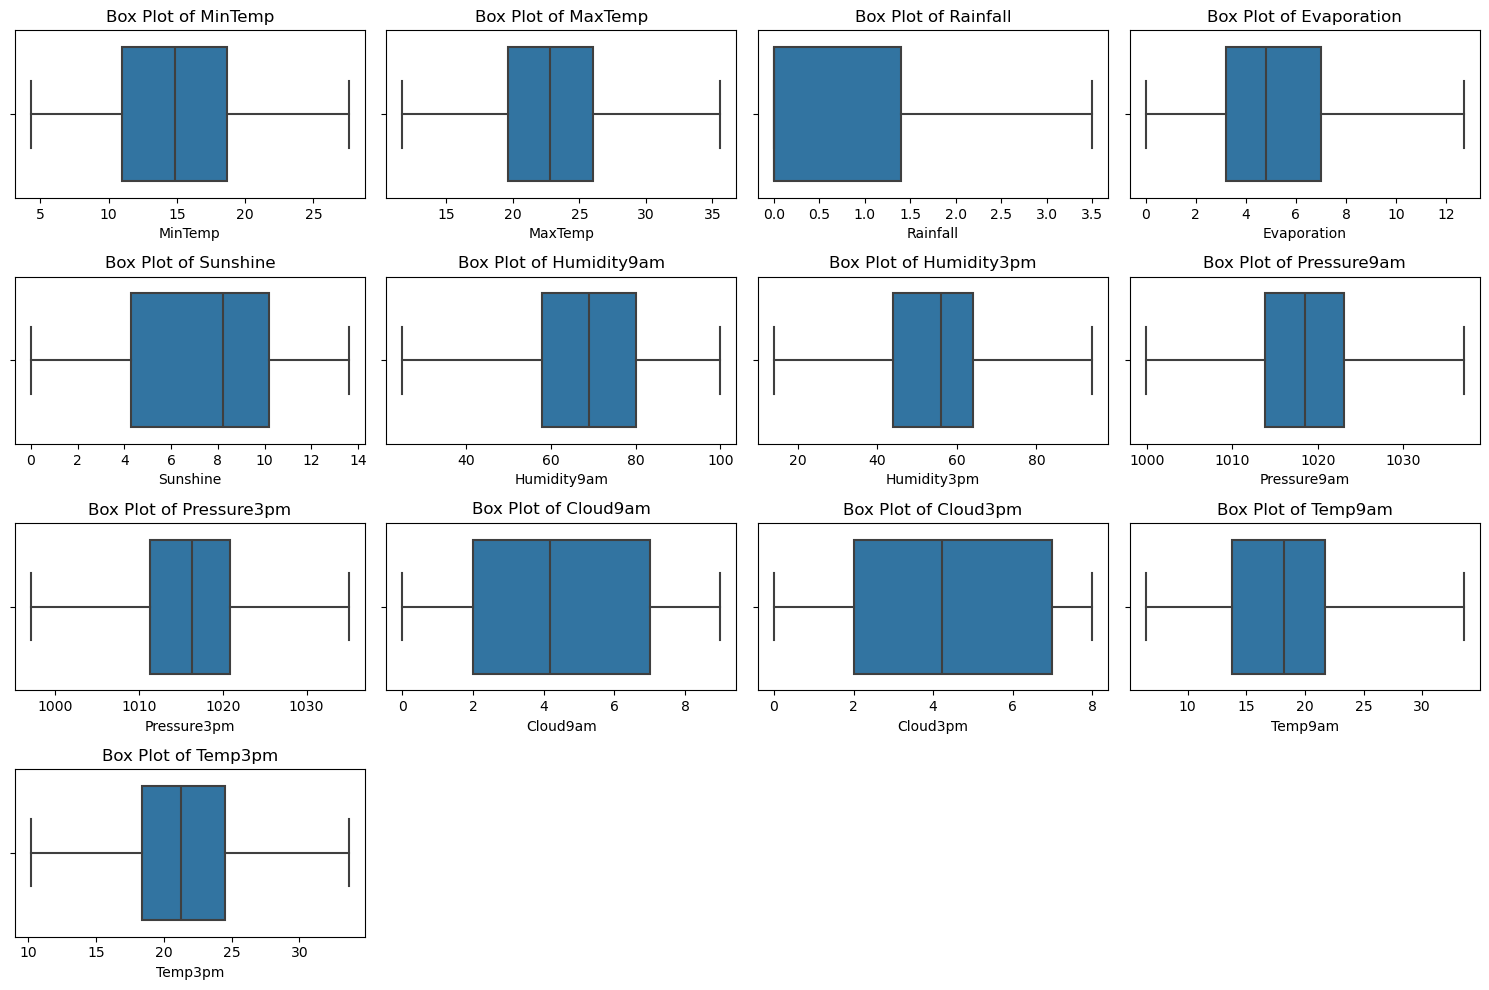

In [155]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_df.columns, 1) :
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    
plt.tight_layout()
plt.show()

## Data Algorithm Models

## 1). Decision Tree Model

In [156]:
X = df.drop(columns=['RainTomorrow_Yes'])  
y = df['RainTomorrow_Yes']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2669, 14) (2669,) (668, 14) (668,)


In [159]:
dtc_tree = tree.DecisionTreeClassifier(max_depth=3)
dtc_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [160]:
y_train_pred = dtc_tree.predict(X_train)
y_test_pred = dtc_tree.predict(X_test)

In [161]:
print("Accuracy Score of (Train) data is :", accuracy_score(y_train, y_train_pred))
print("Accuracy Score of (Test) data is :", accuracy_score(y_test, y_test_pred))
print("Precision Score of (Train) data is :", precision_score(y_train, y_train_pred))
print("Precision Score of (Test) data is :", precision_score(y_test, y_test_pred))
print("Recall Score of (Train) data is :", recall_score(y_train, y_train_pred))
print("Recall Score of (Test) data is :", recall_score(y_test, y_test_pred))
print("ROC AUC Score of (Train) data is :", roc_auc_score(y_train, y_train_pred))
print("ROC AUC Score of (Test) data is :", roc_auc_score(y_test, y_test_pred))

Accuracy Score of (Train) data is : 0.8272761333832896
Accuracy Score of (Test) data is : 0.8023952095808383
Precision Score of (Train) data is : 0.6943462897526502
Precision Score of (Test) data is : 0.6625
Recall Score of (Train) data is : 0.5770925110132159
Recall Score of (Test) data is : 0.5760869565217391
ROC AUC Score of (Train) data is : 0.7450351891082176
ROC AUC Score of (Test) data is : 0.7322583542939275


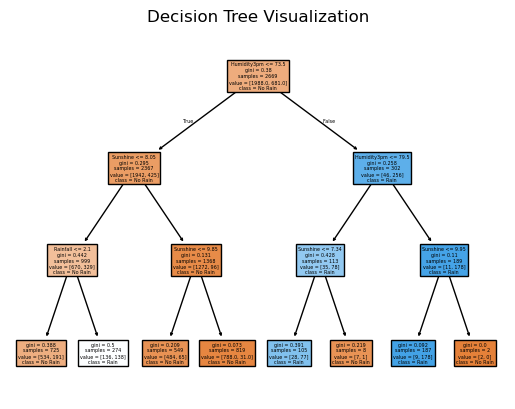

In [162]:
tree.plot_tree(dtc_tree, filled=True, feature_names=X_train.columns.tolist(), class_names=["No Rain", "Rain"])
plt.title("Decision Tree Visualization")
plt.show()

## 2). Random Forest Model

In [163]:
rf = RandomForestClassifier(random_state=42)

In [164]:
param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 4],
}

In [165]:
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 200]},
             scoring='accuracy')

In [166]:
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

In [167]:
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [168]:
print("Accuracy Score of (Train) data is :", accuracy_score(y_train, y_train_pred))
print("Accuracy Score of (Test) data is :", accuracy_score(y_test, y_test_pred))
print("Precision Score of (Train) data is :", precision_score(y_train, y_train_pred))
print("Precision Score of (Test) data is :", precision_score(y_test, y_test_pred))
print("Recall Score of (Train) data is :", recall_score(y_train, y_train_pred))
print("Recall Score of (Test) data is :", recall_score(y_test, y_test_pred))
print("ROC AUC Score of (Train) data is :", roc_auc_score(y_train, y_train_pred))
print("ROC AUC Score of (Test) data is :", roc_auc_score(y_test, y_test_pred))

Accuracy Score of (Train) data is : 0.913825402772574
Accuracy Score of (Test) data is : 0.8233532934131736
Precision Score of (Train) data is : 0.9361702127659575
Precision Score of (Test) data is : 0.75
Recall Score of (Train) data is : 0.71071953010279
Recall Score of (Test) data is : 0.5380434782608695
ROC AUC Score of (Train) data is : 0.8470599662586384
ROC AUC Score of (Test) data is : 0.7349308300395258


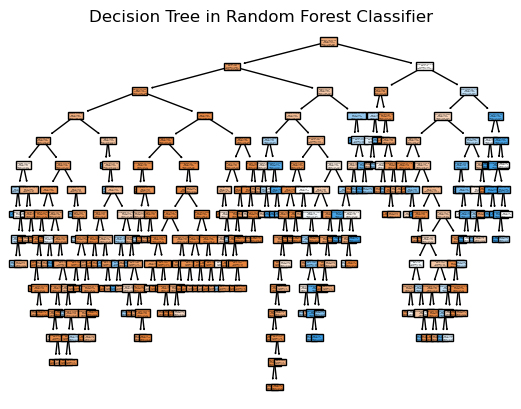

In [169]:
tree.plot_tree(best_rf.estimators_[0], feature_names=list(X_train.columns), class_names=["No Rain", "Rain"], filled=True)
plt.title("Decision Tree in Random Forest Classifier")
plt.show()

## 3). Logistic Regression Model

In [170]:
log = LogisticRegression()
log.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [171]:
y_train_pred = log.predict(X_train)
y_test_pred = log.predict(X_test)

In [172]:
print("Accuracy Score of (Train) data is :", accuracy_score(y_train, y_train_pred))
print("Accuracy Score of (Test) data is :", accuracy_score(y_test, y_test_pred))
print("Precision Score of (Train) data is :", precision_score(y_train, y_train_pred))
print("Precision Score of (Test) data is :", precision_score(y_test, y_test_pred))
print("Recall Score of (Train) data is :", recall_score(y_train, y_train_pred))
print("Recall Score of (Test) data is :", recall_score(y_test, y_test_pred))
print("ROC AUC Score of (Train) data is :", roc_auc_score(y_train, y_train_pred))
print("ROC AUC Score of (Test) data is :", roc_auc_score(y_test, y_test_pred))

Accuracy Score of (Train) data is : 0.8392656425627576
Accuracy Score of (Test) data is : 0.8278443113772455
Precision Score of (Train) data is : 0.7395437262357415
Precision Score of (Test) data is : 0.7412587412587412
Recall Score of (Train) data is : 0.5712187958883994
Recall Score of (Test) data is : 0.5760869565217391
ROC AUC Score of (Train) data is : 0.7511526575015437
ROC AUC Score of (Test) data is : 0.7498203377650018


## 4). Linear Discriminant Analysis

In [173]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [174]:
y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)

In [175]:
print("Accuracy Score of (Train) data is :", accuracy_score(y_train, y_train_pred))
print("Accuracy Score of (Test) data is :", accuracy_score(y_test, y_test_pred))
print("Precision Score of (Train) data is :", precision_score(y_train, y_train_pred))
print("Precision Score of (Test) data is :", precision_score(y_test, y_test_pred))
print("Recall Score of (Train) data is :", recall_score(y_train, y_train_pred))
print("Recall Score of (Test) data is :", recall_score(y_test, y_test_pred))
print("ROC AUC Score of (Train) data is :", roc_auc_score(y_train, y_train_pred))
print("ROC AUC Score of (Test) data is :", roc_auc_score(y_test, y_test_pred))

Accuracy Score of (Train) data is : 0.8332708879730236
Accuracy Score of (Test) data is : 0.8233532934131736
Precision Score of (Train) data is : 0.7084805653710248
Precision Score of (Test) data is : 0.72
Recall Score of (Train) data is : 0.5888399412628488
Recall Score of (Test) data is : 0.5869565217391305
ROC AUC Score of (Train) data is : 0.7529209766676417
ROC AUC Score of (Test) data is : 0.750089831117499


## 5). AdaBoost Model

In [176]:
ada = AdaBoostClassifier() 
ada_model = ada.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [177]:
y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_test)

In [178]:
print("Accuracy Score of (Train) data is :", accuracy_score(y_train, y_train_pred))
print("Accuracy Score of (Test) data is :", accuracy_score(y_test, y_test_pred))
print("Precision Score of (Train) data is :", precision_score(y_train, y_train_pred))
print("Precision Score of (Test) data is :", precision_score(y_test, y_test_pred))
print("Recall Score of (Train) data is :", recall_score(y_train, y_train_pred))
print("Recall Score of (Test) data is :", recall_score(y_test, y_test_pred))
print("ROC AUC Score of (Train) data is :", roc_auc_score(y_train, y_train_pred))
print("ROC AUC Score of (Test) data is :", roc_auc_score(y_test, y_test_pred))

Accuracy Score of (Train) data is : 0.8493817909329336
Accuracy Score of (Test) data is : 0.8188622754491018
Precision Score of (Train) data is : 0.7900207900207901
Precision Score of (Test) data is : 0.752
Recall Score of (Train) data is : 0.5580029368575624
Recall Score of (Test) data is : 0.5108695652173914
ROC AUC Score of (Train) data is : 0.7535990539418596
ROC AUC Score of (Test) data is : 0.7234099892202659


## 6). Bagging Model

In [179]:
tree = DecisionTreeClassifier(random_state=42)
bag_mdl = BaggingClassifier(estimator=tree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

In [180]:
bag_mdl.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [181]:
y_train_pred = bag_mdl.predict(X_train)
y_test_pred = bag_mdl.predict(X_test)

In [182]:
print("Accuracy Score of (Train) data is :", accuracy_score(y_train, y_train_pred))
print("Accuracy Score of (Test) data is :", accuracy_score(y_test, y_test_pred))
print("Precision Score of (Train) data is :", precision_score(y_train, y_train_pred))
print("Precision Score of (Test) data is :", precision_score(y_test, y_test_pred))
print("Recall Score of (Train) data is :", recall_score(y_train, y_train_pred))
print("Recall Score of (Test) data is :", recall_score(y_test, y_test_pred))
print("ROC AUC Score of (Train) data is :", roc_auc_score(y_train, y_train_pred))
print("ROC AUC Score of (Test) data is :", roc_auc_score(y_test, y_test_pred))

Accuracy Score of (Train) data is : 1.0
Accuracy Score of (Test) data is : 0.8233532934131736
Precision Score of (Train) data is : 1.0
Precision Score of (Test) data is : 0.726027397260274
Recall Score of (Train) data is : 1.0
Recall Score of (Test) data is : 0.5760869565217391
ROC AUC Score of (Train) data is : 1.0
ROC AUC Score of (Test) data is : 0.7467211642112829


## 7). XGBoost Model

In [183]:
xgb = XGBClassifier(n_jobs=-1,random_state=42)

In [184]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

In [185]:
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [186]:
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

In [187]:
y_train_pred = best_classifier.predict(X_train)
y_test_pred = best_classifier.predict(X_test)

In [188]:
print("Accuracy Score of (Train) data is :", accuracy_score(y_train, y_train_pred))
print("Accuracy Score of (Test) data is :", accuracy_score(y_test, y_test_pred))
print("Precision Score of (Train) data is :", precision_score(y_train, y_train_pred))
print("Precision Score of (Test) data is :", precision_score(y_test, y_test_pred))
print("Recall Score of (Train) data is :", recall_score(y_train, y_train_pred))
print("Recall Score of (Test) data is :", recall_score(y_test, y_test_pred))
print("ROC AUC Score of (Train) data is :", roc_auc_score(y_train, y_train_pred))
print("ROC AUC Score of (Test) data is :", roc_auc_score(y_test, y_test_pred))

Accuracy Score of (Train) data is : 0.8905957287373548
Accuracy Score of (Test) data is : 0.8173652694610778
Precision Score of (Train) data is : 0.8791423001949318
Precision Score of (Test) data is : 0.7123287671232876
Recall Score of (Train) data is : 0.6622613803230544
Recall Score of (Test) data is : 0.5652173913043478
ROC AUC Score of (Train) data is : 0.8155371287933179
ROC AUC Score of (Test) data is : 0.7392202659001077


## Questions and Answers for the project

#### Question 1 - Your views about the problem statement?

#### Answer 1 -
The problem statement consists of weather variables dataset which could predict rainfall in Sydney. The dataset consists of data covering weather-related variables from 2008 to 2017. The goal is to enhance the accuracy of rainfall predictions by utilizing features such as temperature, humidity, evaporation, sunshine, mintemp, maxtemp, rainfall, clouds and pressure. This goal can be achieved by the application of machine learning tools in weather forecasting.

#### Question 2 - What will be your approach to solving this task?

#### Answer 2 -
Data Preprocessing:- 
a). Categorical Variables into Numeric Variables Using Dummy Variable : Converted  the RainToday and RainTomorrow into numeric values by creating dummy variables. Now the problem was that In the individual columns, dummy variable created a boolean datatype values in the RainToday_Yes  and RainTomorrow_Yes columns. These columns with boolean datatype were then converted to integer datatype columns. Thereafter, both the columns had integer values of 0 and 1.

b). Null Values: By analyzing the provided data set, I found that the data does contain many null values. Now, these values were replaced with the mean of their individual columns.

c). Outliers : By analyzing the provided data set and we found many outliers in the individual columns. We treated them using Inter-quartile Range method(iqr) in order to remove the outliers from the data.

2)After Data Pre-processing, we applied different ml models like Decision Tree Regression, Logistic Regression, Random Forest Regression, Linear Discriminant Analysis, AdaBoost Regressor, Bagging Regressor and XGBoost Regressor model. 

3). Afterwards, I employed several performance metrics like Accuracy_Score, ROC_AUC_Score, Recall_Score and Precision_Score to evaluate model performance on the validation set and also applied hyperparameters like GridSearchCV , learning_rate, n_estimators for optimal performance.

#### Question 3 - What were the available ML model options you had to perform this task? 

#### Answer 3 -
Available ML Models were - 
2)After Data Pre-processing, we applied different ml models like i) Decision Tree Regression, ii) Logistic Regression, iii) Random Forest Regression, iv) Linear Discriminant Analysis, v) AdaBoost Regressor, vi) Bagging Regressor & vii) XGBoost Regressor model.

#### Question 4 - Which model's performance is best and what could be the possible reason for that?

#### Answer 4 -
Accuracy_Score of different ML models:- 
1). Decision Tree Regression Model - Accuracy Score of (Test) data is : 0.8023952095808383
2). Random Forest Regression -  Accuracy Score of (Test) data is : 0.8233532934131736
3). Logistic Regression -       Accuracy Score of (Test) data is : 0.8278443113772455 
4). LDA Regression Model -      Accuracy Score of (Test) data is : 0.8233532934131736 
5). AdaBoost Regression Model - Accuracy Score of (Test) data is : 0.8188622754491018 
6). Bagging Regressor Model -   Accuracy Score of (Test) data is : 0.8233532934131736 
7). XGBoost Regressor Model -   Accuracy Score of (Test) data is : 0.8173652694610778
As we can see, The Accuracy score of Logistic Regression is higher, hence this model's performance is the best. Although, I believe the other values like precision_score, recall_score and roc_auc_score should be taken into account while assessing the model's performance. 

#### Question 5 - What steps can you take to improve this selected model's performance even further?

#### Answer 5 - 
Steps to improve performance would be -
1). Gathering More Data: More data will significantly improve the model's ability to generalize.
2). Feature analysis: Analyzing the individual feature scores to understand which features will have the most impact on rainfall predictions.
3). Early stopping: Implementing early stopping to prevent overfitting. Stop the training of the model when its performance on the validation set starts to decline.
4). Hyperparameter Tuning: Fine-tuning model hyperparameters like GridSearch ensures optimal performance.
5). Ensemble Methods: Combining well-performing models through techniques like bagging, stacking or boosting may improve overall accuracy.

Project Ends here......